# DESAFIO PRUEBAS DE HIPOTESIS

## 1. Evaluar juicios de hipótesis

ENUNCIADO:
75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se
identificaron como homosexuales, y 75 alcanzados por activistas pro-LGTB que se
identificaron como heterosexuales. El objetivo era medir actitudes frente a la
adopción homoparentales. La organización encargada de procesar los datos obtuvo
los siguientes resultados:
○ El 67% de los encuestados por heterosexuales se mostró a favor de la
adopción homoparental, mientras que un 72% de los encuestados por
activistas que se identificaron como homosexuales se mostraron a favor de
la adopción homoparental.
○ Asumiendo que la hipótesis nula es que ambos porcentajes no son
diferentes, y la hipótesis alternativa es que existe una diferencia substancial
entre ambos.
○ Con p-valor de 0.1183 ¿es posible rechazar la hipótesis nula en favor de la
alternativa con una confianza de 95%?, ¿Cuanta es la confianza máxima con
la que sería posible rechazar la hipótesis nula en favor de la alternativa con
estos resultados?

RESPUESTA:
En relación a un p-valor = 0.1183 quiere decir que, teniendo en cuenta que la función de probabilidad de la hipótesis nula se distribuye normalmente y una confianza del 95%, el p-valor obtenido no es suficientemente pequeño como para refutar la hipótesis nula y luego, la máxima confianza con la que podemos rechazar la hipótesis nula (considerando el p-valor obtenido) es de un 88,2%.

## 2. Importe la base de datos utilizada la sesión presencial anterior

In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv("nations.csv")

In [59]:
regiones=df.region.unique()

In [60]:
regiones

array(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'], dtype=object)

In [6]:
for i in regiones:
    df[i]=np.where(df.region==i,1,0)

## 3. Implemente una función de prueba de hipótesis a mano

In [9]:
import scipy.stats

In [19]:
def prueba_hip(df,variable,binarize):
    df.dropna(subset=[variable],inplace=True)
    df_pertenece=df.loc[df[binarize]==1,variable]
    df_no_pertenece=df.loc[df[binarize]==0,variable]
    media_pertenece=df_pertenece.mean()
    media_no_pertenece=df_no_pertenece.mean()
    diferencia_media=media_pertenece-media_no_pertenece
    t,pval=scipy.stats.ttest_ind(df_pertenece,df_no_pertenece)
    print(f'la media para el grupo 0 es de: {media_no_pertenece}')
    print(f'la media para el grupo 1 es de: {media_pertenece}')
    print(f'la diferencia entre las medias es de: {media_no_pertenece-media_pertenece}')
    print(f'el valor Z es de: {t}')
    print(f'el p-valor es de:{pval}')

    
    
    

In [20]:
prueba_hip(df,"chldmort","Africa")

la media para el grupo 0 es de: 24.74822695035461
la media para el grupo 1 es de: 109.75
la diferencia entre las medias es de: -85.0017730496454
el valor Z es de: 14.17367667788517
el p-valor es de:1.244572684496239e-31


In [21]:
prueba_hip(df,"adfert","Africa")

la media para el grupo 0 es de: 37.07304971691565
la media para el grupo 1 es de: 92.72115342892131
la diferencia entre las medias es de: -55.648103712005664
el valor Z es de: 9.39160348034399
el p-valor es de:1.818718008921367e-17


In [22]:
prueba_hip(df,"life","Africa")

la media para el grupo 0 es de: 73.15094540643354
la media para el grupo 1 es de: 56.490384542025055
la diferencia entre las medias es de: 16.66056086440848
el valor Z es de: -15.128218821955231
el p-valor es de:1.6698309288018e-34


## COMENTARIOS

Para los ejemplos ejecutados en las 3 celdas anteriores:

Se puede decir que dadas la separaciones en dos grupos, 1 con paises pertenecientes a la región de Africa y el otro con paises del resto del mundo:
Se puede decir que para las tres variables analizadas el p-valor es pequeño y por tanto se puede concluir que:

Para las 3 variables, las medias de las variables respectivas del grupo de paises pertenecientes a la región de Africa on diferentes a las medias reportadas para los países del resto del mundo

## 4. Implemente una función que grafique los histogramas para ambas muestras.


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
def grafica_hist(df,variable,binarize):
    df.dropna(subset=[variable],inplace=True)
    plt.figure(figsize=(10.0,10.0))
    plt.ylabel("Cuenta")
    plt.title(f"Comparación Distribución de {variable} para {binarize} v/s Resto del mundo")
    sns.histplot(df,x=variable,hue=binarize,alpha=0.1,kde=True)
    

In [62]:
prueba_hip(df,"chldmort","Africa")

la media para el grupo 0 es de: 24.74822695035461
la media para el grupo 1 es de: 109.75
la diferencia entre las medias es de: -85.0017730496454
el valor Z es de: 14.17367667788517
el p-valor es de:1.244572684496239e-31


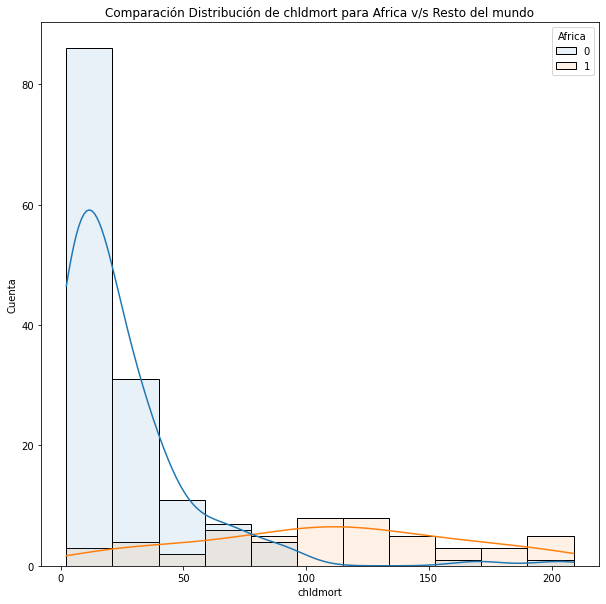

In [61]:
grafica_hist(df,"chldmort","Africa")

### En relación a las dos celdas anteriores se puede ver que efectivamente ambos grupos difieren considerablemente, lo que coincide en la prueba de hipótesis al rechazar la hipótesis nula de que ambas medias son iguales con la superposición de histogramas.

In [63]:
prueba_hip(df,"adfert","Africa")

la media para el grupo 0 es de: 37.07304971691565
la media para el grupo 1 es de: 92.72115342892131
la diferencia entre las medias es de: -55.648103712005664
el valor Z es de: 9.39160348034399
el p-valor es de:1.818718008921367e-17


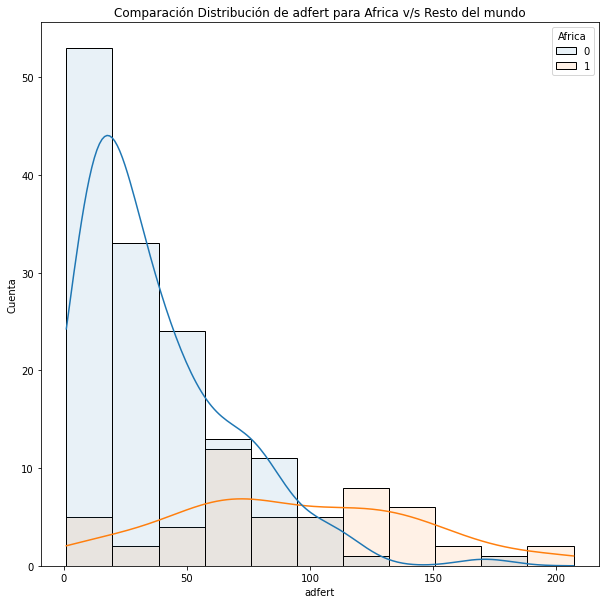

In [64]:
grafica_hist(df,"adfert","Africa")

### En relación a las dos celdas anteriores se puede ver que efectivamente ambos grupos difieren considerablemente, lo que coincide en la prueba de hipótesis al rechazar la hipótesis nula de que ambas medias son iguales con la superposición de histogramas.

In [66]:
prueba_hip(df,"life","Africa")

la media para el grupo 0 es de: 73.15094540643354
la media para el grupo 1 es de: 56.490384542025055
la diferencia entre las medias es de: 16.66056086440848
el valor Z es de: -15.128218821955231
el p-valor es de:1.6698309288018e-34


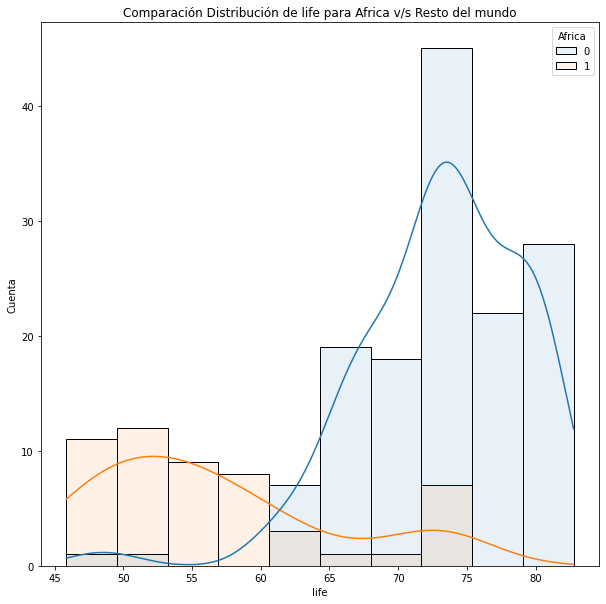

In [67]:
grafica_hist(df,"life","Africa")

### En relación a las dos celdas anteriores se puede ver que efectivamente ambos grupos difieren considerablemente, lo que coincide en la prueba de hipótesis al rechazar la hipótesis nula de que ambas medias son iguales con la superposición de histogramas.

In [73]:
prueba_hip(df,"chldmort","Americas")

la media para el grupo 0 es de: 53.052215189873415
la media para el grupo 1 es de: 23.264285714285716
la diferencia entre las medias es de: 29.7879294755877
el valor Z es de: -3.08561941878294
el p-valor es de:0.00233300081092071


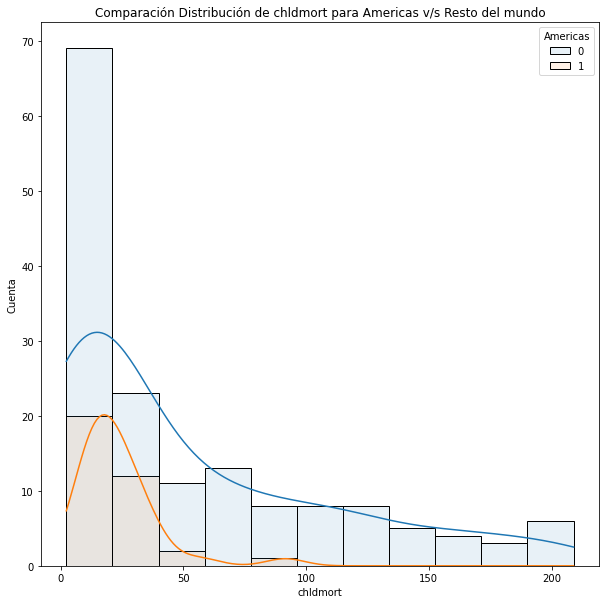

In [74]:
grafica_hist(df,"chldmort","Americas")

### En relación a las dos celdas anteriores se puede ver que efectivamente ambos grupos difieren pero no con una magnitud tan robusta, lo que coincide en la prueba de hipótesis al rechazar la hipótesis nula de que ambas medias son iguales con una confianza del 99,8% con la superposición de histogramas.

In [72]:
prueba_hip(df,"adfert","Americas")

la media para el grupo 0 es de: 49.498101226136654
la media para el grupo 1 es de: 63.659999847412095
la diferencia entre las medias es de: -14.16189862127544
el valor Z es de: 1.7302006120060143
el p-valor es de:0.08520970457396909


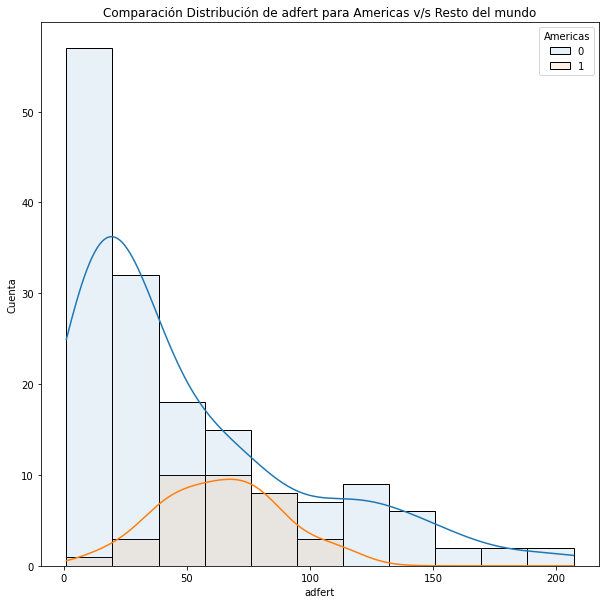

In [71]:
grafica_hist(df,"adfert","Americas")

### En relación a las dos celdas anteriores se puede ver que efectivamente ambos grupos difieren pero no con una magnitud robusta, lo que coincide en la prueba de hipótesis al rechazar la hipótesis nula con una confianza del 92% de que ambas medias son iguales con la superposición de histogramas.

In [80]:
prueba_hip(df,"life","Americas")

la media para el grupo 0 es de: 67.60116024258771
la media para el grupo 1 es de: 73.45142800467355
la diferencia entre las medias es de: -5.850267762085835
el valor Z es de: 3.1936304703663914
el p-valor es de:0.001643459716220544


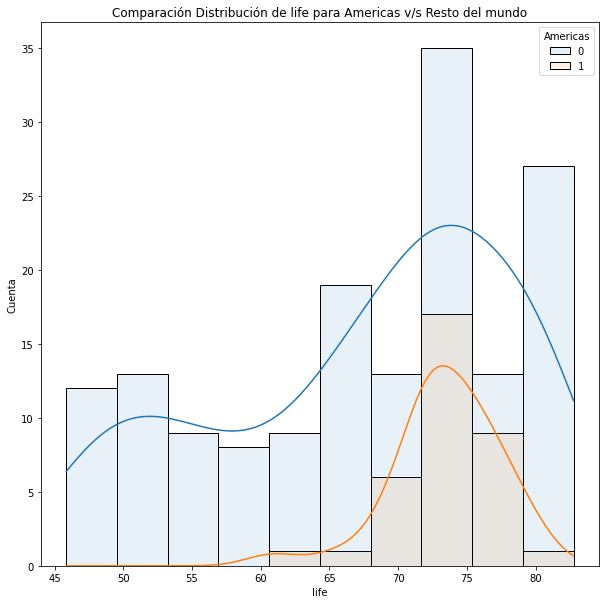

In [79]:
grafica_hist(df,"life","Americas")

### En relación a las dos celdas anteriores se puede ver que efectivamente ambos grupos difieren pero no con una magnitud robusta, lo que coincide en la prueba de hipótesis al rechazar la hipótesis nula con una confianza del 99,9% de que ambas medias son iguales con la superposición de histogramas.

In [81]:
prueba_hip(df,"chldmort","Asia")

la media para el grupo 0 es de: 51.141379310344824
la media para el grupo 1 es de: 37.104166666666664
la diferencia entre las medias es de: 14.03721264367816
el valor Z es de: -1.602738386676471
el p-valor es de:0.1106448646711535


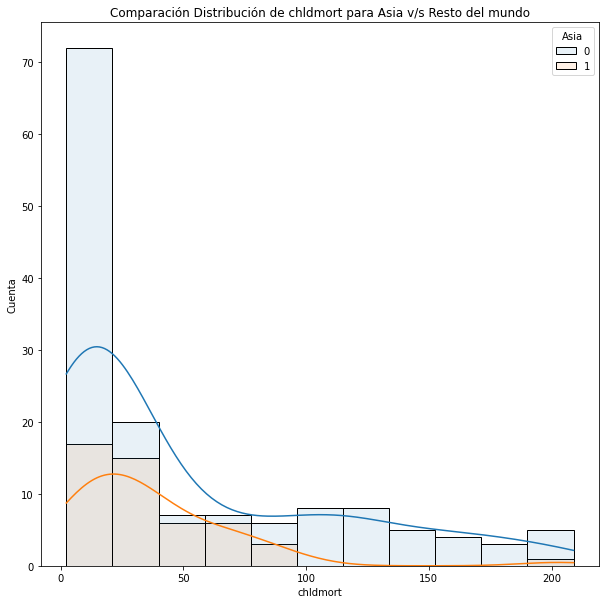

In [89]:
grafica_hist(df,"chldmort","Asia")

### En relación a las dos celdas anteriores se puede ver que efectivamente ambos grupos no difieren considerablemente, lo que coincide en la prueba de hipótesis al obtener un p-valor de 0.11 y la similitud de ambos histogramas.

In [84]:
prueba_hip(df,"adfert","Asia")

la media para el grupo 0 es de: 57.87999988671005
la media para el grupo 1 es de: 34.50416676700115
la diferencia entre las medias es de: 23.3758331197089
el valor Z es de: -3.266725933363396
el p-valor es de:0.0012898359044805575


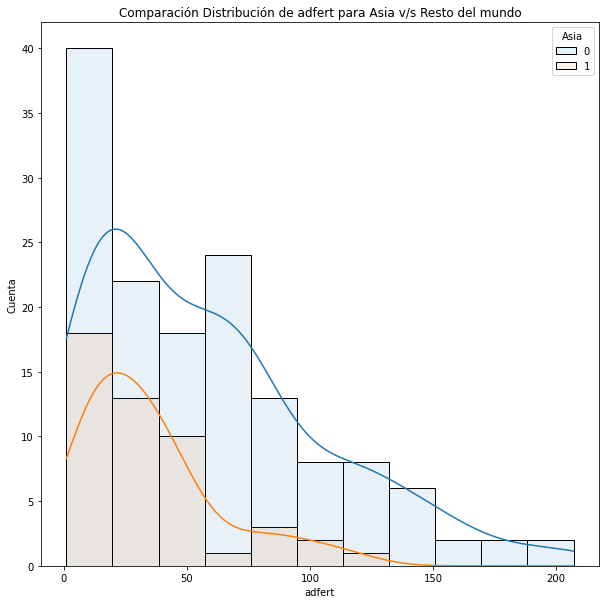

In [87]:
grafica_hist(df,"adfert","Asia")

### En relación a las dos celdas anteriores se puede ver que efectivamente ambos grupos difieren considerablemente lo que coincide en la prueba de hipótesis al rechazar la hipótesis nula con una confianza del 99,9% de que ambas medias son iguales con la superposición de histogramas.

In [86]:
prueba_hip(df,"life","Asia")

la media para el grupo 0 es de: 68.0050572625522
la media para el grupo 1 es de: 70.64687490463257
la diferencia entre las medias es de: -2.641817642080369
el valor Z es de: 1.5867223401099084
el p-valor es de:0.11422966376506538


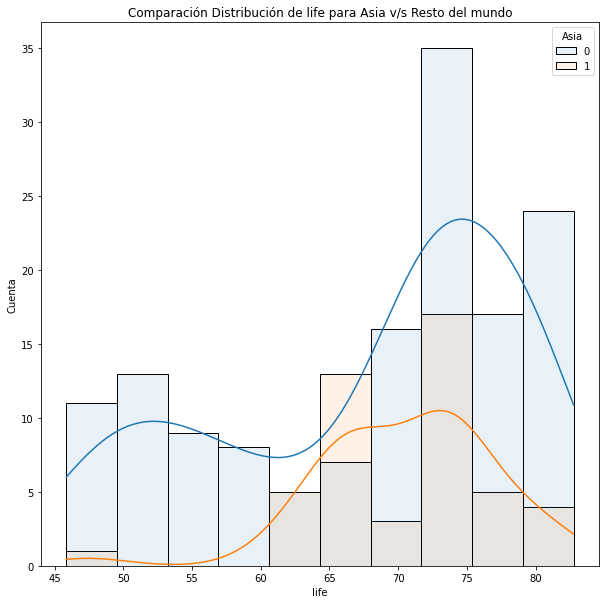

In [88]:
grafica_hist(df,"life","Asia")

### En relación a las dos celdas anteriores se puede ver que efectivamente ambos grupos no difieren considerablemente, lo que coincide en la prueba de hipótesis al obtener un p-valor de 0.11 y la similitud de ambos histogramas.

In [90]:
prueba_hip(df,"chldmort","Europe")

la media para el grupo 0 es de: 59.29
la media para el grupo 1 es de: 7.046511627906977
la diferencia entre las medias es de: 52.243488372093026
el valor Z es de: -6.262400472976766
el p-valor es de:2.4506589890929246e-09


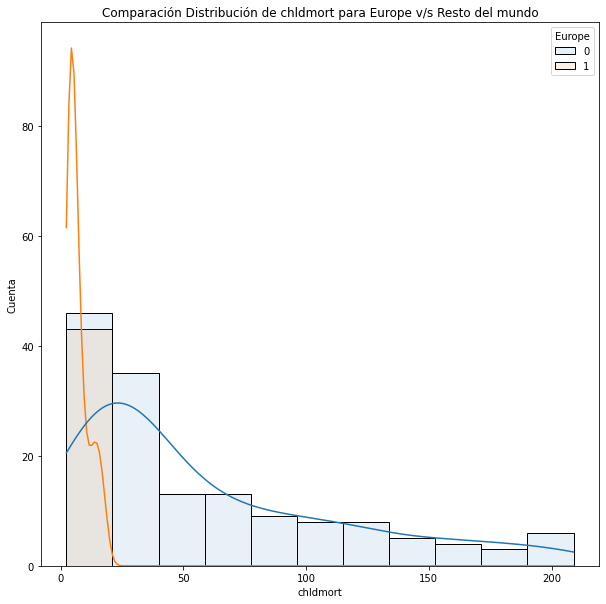

In [91]:
grafica_hist(df,"chldmort","Europe")

### En relación a las dos celdas anteriores se puede ver que efectivamente ambos grupos difieren considerablemente lo que coincide en la prueba de hipótesis al rechazar la hipótesis nula de que ambas medias son iguales con la superposición de histogramas.

In [93]:
prueba_hip(df,"adfert","Europe")

la media para el grupo 0 es de: 62.537999919255576
la media para el grupo 1 es de: 15.537209313969276
la diferencia entre las medias es de: 47.0007906052863
el valor Z es de: -6.872270305789422
el p-valor es de:8.69834034911464e-11


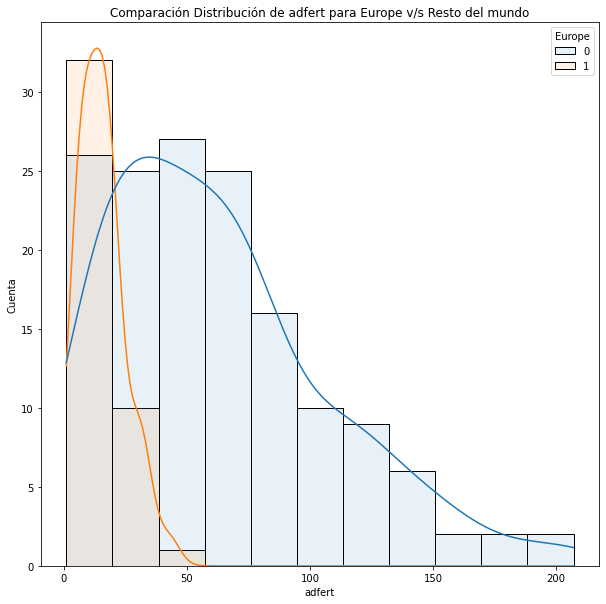

In [94]:
grafica_hist(df,"adfert","Europe")

### En relación a las dos celdas anteriores se puede ver que efectivamente ambos grupos difieren considerablemente lo que coincide en la prueba de hipótesis al rechazar la hipótesis nula de que ambas medias son iguales con la superposición de histogramas.

In [95]:
prueba_hip(df,"life","Europe")

la media para el grupo 0 es de: 66.2874442799886
la media para el grupo 1 es de: 76.94573619753815
la diferencia entre las medias es de: -10.658291917549548
el valor Z es de: 6.828978989179335
el p-valor es de:1.1089926016720369e-10


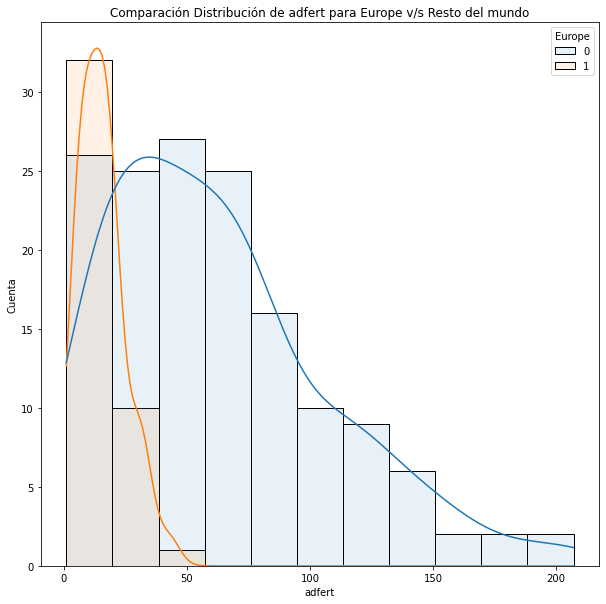

In [96]:
grafica_hist(df,"adfert","Europe")

### En relación a las dos celdas anteriores se puede ver que efectivamente ambos grupos difieren considerablemente lo que coincide en la prueba de hipótesis al rechazar la hipótesis nula de que ambas medias son iguales con la superposición de histogramas.

In [100]:
prueba_hip(df,"chldmort","Oceania")

la media para el grupo 0 es de: 48.34410112359551
la media para el grupo 1 es de: 39.416666666666664
la diferencia entre las medias es de: 8.927434456928843
el valor Z es de: -0.6277779742677246
el p-valor es de:0.5308992371716935


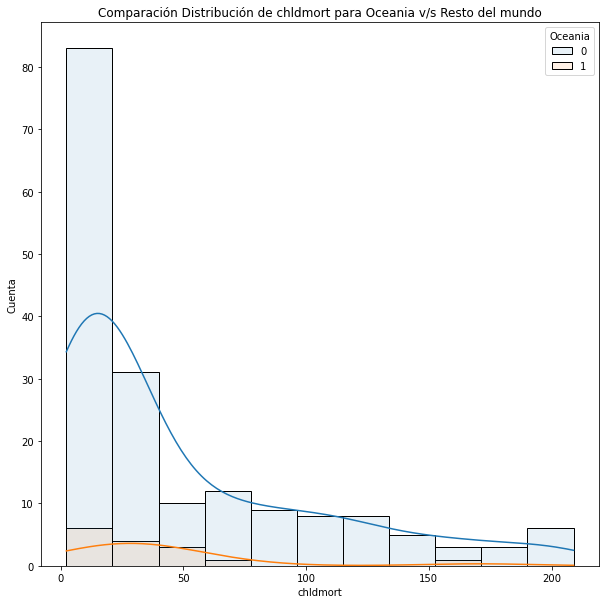

In [101]:
grafica_hist(df,"chldmort","Oceania")

### En relación a las dos celdas anteriores se puede ver que efectivamente ambos grupos no difieren considerablemente, lo que coincide en la prueba de hipótesis al obtener un p-valor de 0.53 y la similitud de ambos histogramas.

In [102]:
prueba_hip(df,"adfert","Oceania")

la media para el grupo 0 es de: 52.66235942853969
la media para el grupo 1 es de: 44.99333400726322
la diferencia entre las medias es de: 7.669025421276466
el valor Z es de: -0.646704931668313
el p-valor es de:0.5185993085186547


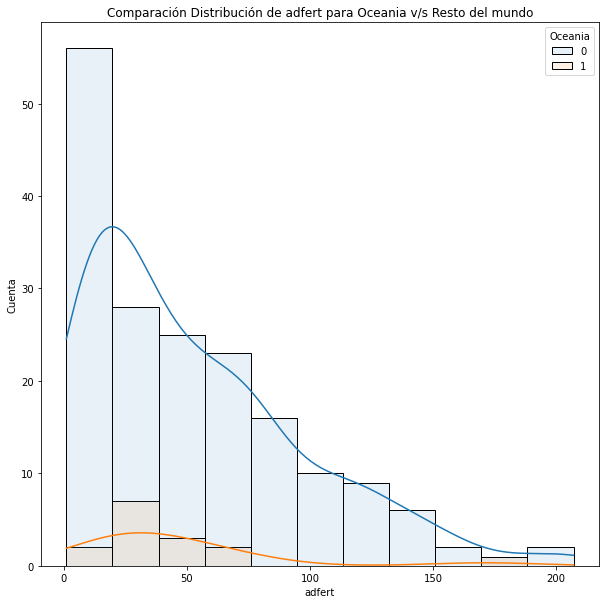

In [103]:
grafica_hist(df,"adfert","Oceania")

### En relación a las dos celdas anteriores se puede ver que efectivamente ambos grupos no difieren considerablemente, lo que coincide en la prueba de hipótesis al obtener un p-valor de 0.52 y la similitud de ambos histogramas.

In [104]:
prueba_hip(df,"life","Oceania")

la media para el grupo 0 es de: 68.5843630801426
la media para el grupo 1 es de: 69.58444468180339
la diferencia entre las medias es de: -1.0000816016607956
el valor Z es de: 0.3697398546321175
el p-valor es de:0.7119859586705626


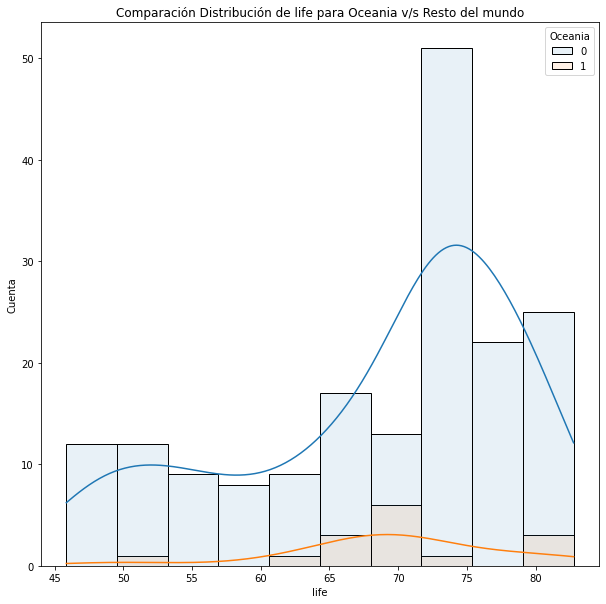

In [105]:
grafica_hist(df,"life","Oceania")

### En relación a las dos celdas anteriores se puede ver que efectivamente ambos grupos no difieren considerablemente, lo que coincide en la prueba de hipótesis al obtener un p-valor de 0.71 y la similitud de ambos histogramas.